# Plot de la fonction affine d'un dataset à l'aide d'un algorithme de régression linéaire

Définissons d’abord les termes employés dans le titre :

- `Plot` est un anglicisme signifiant **tracer une courbe sur un graphique**.
- Un `dataset` est un **ensemble structuré de données**. Dans ce contexte, il s’agit d’un fichier listant les ventes d’un véhicule, avec pour chacune son kilométrage et son prix de vente.
- Une `fonction affine` est une fonction $f$ définie par $ f(x) = a \cdot x + b $, où $a$ et $b$ sont des réels. Elle s’écrit aussi $ y = a \cdot x + b $ pour souligner son interprétation graphique : **une droite**. Ses paramètres s’interprètent comme suit :
    - $x$ : le **kilométrage** ;
    - $y$ : le **prix de vente** ;
    - $a$ : le **coefficient directeur**, ou **pente**, exprimant la variation du prix en fonction de la distance parcourue ;
    - $b$ : l’**ordonnée à l’origine**, représentant le prix d’un véhicule neuf.
- En ce qui concerne `l’algorithme de régression linéaire`, il sera défini ultérieurement. Il permettra d’estimer les **valeurs** de $a$ et $b$ grâce au `dataset`.

Pour ce projet, nous utiliserons trois **librairies externes** :

In [1]:
import pandas as pd #  Read csv
import numpy as np  #  Store value
import matplotlib.pyplot as plt #  Plot point and straight line

 - `pandas` : pour lire le fichier `data.csv` ;
 - `numpy` : pour stocker les valeurs du fichier, étant donné qu’il est inclus automatiquement avec `pandas` ;
 - `matplotlib.pyplot` : pour représenter graphiquement les données.

Il est désormais possible de lire le fichier `data.csv` et d’en afficher les valeurs.

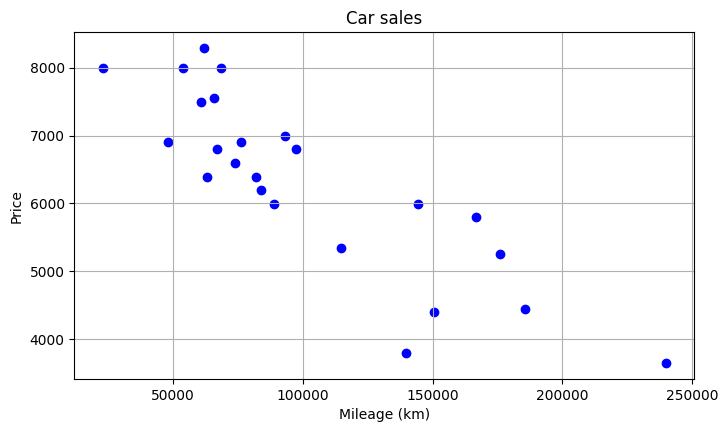

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


def main():
    df = pd.read_csv("../data/data.csv")

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df['km'], df['price'], color='blue', marker='o')
    plt.grid(True)

    plt.title("Car sales")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()


if __name__ == "__main__":
    main()

Le graphique présente les **kilométrages** en abscisse et les **prix de vente** en ordonnée. Chaque point correspond à une transaction. On observe une **tendance linéaire décroissante** : le prix diminue à mesure que le kilométrage augmente. L’objectif est de représenter la **fonction affine** modélisant cette relation, dans le but de **prédire le prix de vente en fonction du kilométrage**.

Pour la suite, j’ajoute des segments entre les points afin de mettre en évidence l’**ordonnée à l’origine** et la **pente** de chaque segment. Cette représentation est plus appropriée pour l’analyse à venir.

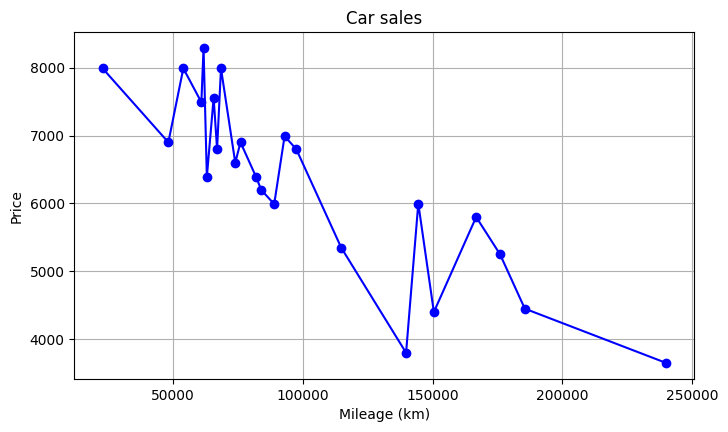

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    plt.figure(figsize=(8, 4.5))
    plt.plot(df['km'], df['price'], color='blue', linestyle='-', marker='o')
    plt.grid(True)

    plt.title("Car sales")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()


if __name__ == "__main__":
    main()

Il est désormais possible d’observer chaque segment et de déterminer la **fonction affine** associée.

Une fonction affine s’exprime par :
$$ y = a \cdot x + b $$

Soient $x_1$ et $y_1$ les coordonnées du premier point, et $x_2$ et $y_2$ celles du second. Les coefficients s’obtiennent à l'aide des formules suivantes :

$$ a = \frac{y_2 - y_1}{x_2 - x_1} $$
$$ b = y_1 - a \cdot x_1 $$


In [4]:
import pandas as pd


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def iterate_df(df: pd.DataFrame) -> None:
    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        print(f"x1: {x1: 7} x2: {x2: 7} y1: {y1: 5} y2: {y2: 5} | a: {a: .5f} - b: {b: 13.5f}")


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    iterate_df(df)

if __name__ == "__main__":
    main()

x1:   22899 x2:   48235 y1:  7990 y2:  6900 | a: -0.04302 - b:    8975.15590
x1:   48235 x2:   54000 y1:  6900 y2:  7990 | a:  0.18907 - b:   -2219.88725
x1:   54000 x2:   60949 y1:  7990 y2:  7490 | a: -0.07195 - b:   11875.45114
x1:   60949 x2:   61789 y1:  7490 y2:  8290 | a:  0.95238 - b:  -50556.66667
x1:   61789 x2:   63060 y1:  8290 y2:  6390 | a: -1.49489 - b:  100657.50590
x1:   63060 x2:   65674 y1:  6390 y2:  7555 | a:  0.44568 - b:  -21714.39939
x1:   65674 x2:   67000 y1:  7555 y2:  6800 | a: -0.56938 - b:   44948.56712
x1:   67000 x2:   68500 y1:  6800 y2:  7990 | a:  0.79333 - b:  -46353.33333
x1:   68500 x2:   74000 y1:  7990 y2:  6600 | a: -0.25273 - b:   25301.81818
x1:   74000 x2:   76025 y1:  6600 y2:  6900 | a:  0.14815 - b:   -4362.96296
x1:   76025 x2:   82029 y1:  6900 y2:  6390 | a: -0.08494 - b:   13357.81979
x1:   82029 x2:   84000 y1:  6390 y2:  6200 | a: -0.09640 - b:   14297.41248
x1:   84000 x2:   89000 y1:  6200 y2:  5990 | a: -0.04200 - b:    9728.00000

Une fois l’ensemble des valeurs obtenues, leurs moyennes peuvent être calculées afin d’afficher la fonction affine correspondante.

a:  0.00279 | b:    6233.69744


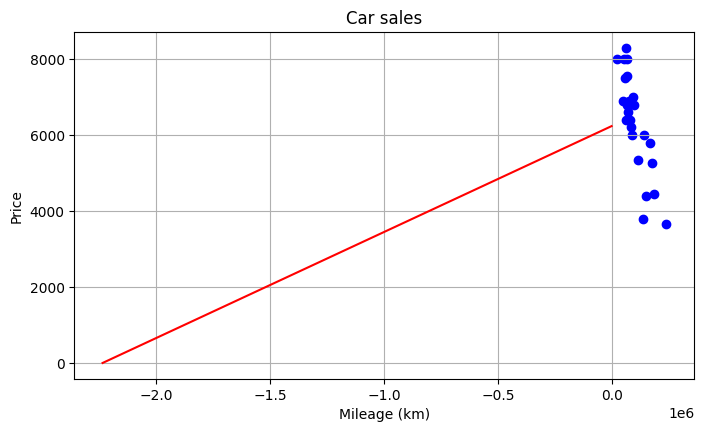

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def mean_affine(df: pd.DataFrame) -> tuple[float, float]:
    total_a, total_b = 0, 0

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        total_a += a
        total_b += b

    a = total_a / (len(df) - 1)
    b = total_b / (len(df) - 1)

    return (a, b)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b = mean_affine(df)
    print(f"a: {a: .5f} | b: {b: 13.5f}")

    x_val = [0, -b / a]
    y_val = [b, 0]

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df['km'], df['price'], color='blue', marker='o')
    plt.plot(x_val, y_val, color='red', linestyle='-', label='Affine approximation')
    plt.grid(True)

    plt.title("Car sales")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()

if __name__ == "__main__":
    main()

La fonction obtenue ne semble pas refléter fidèlement les ventes.

Pour en analyser l’origine, nous allons **examiner** l’évolution des coefficients $a$ et $b$ en fonction du **kilométrage du premier point** de chaque segment.

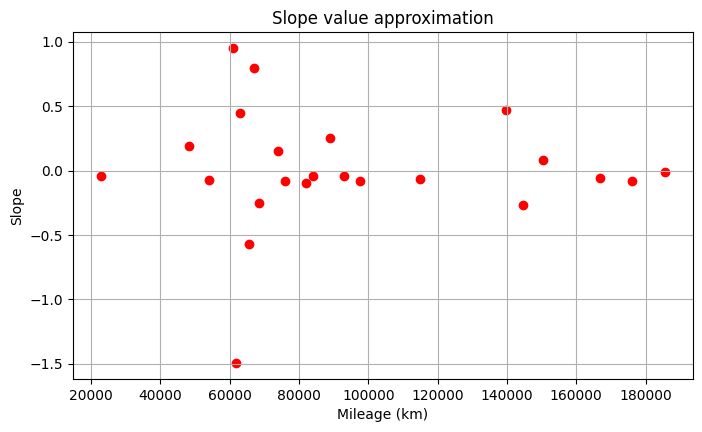

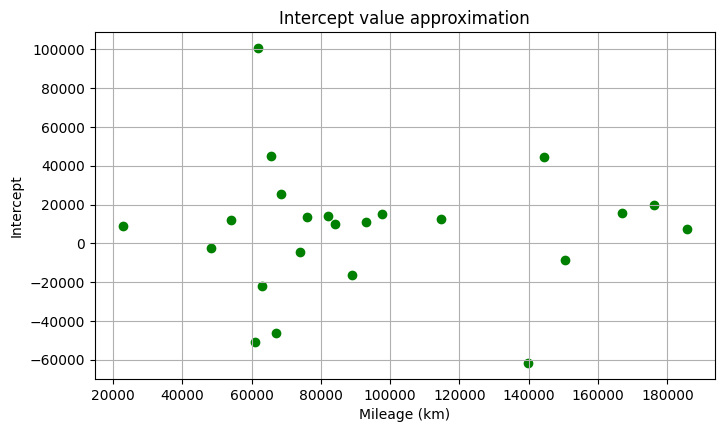

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def build_df_affine(df: pd.DataFrame) -> tuple[float, float, pd.DataFrame]:
    total_a, total_b = 0, 0
    df_affine = pd.DataFrame(dtype=np.float64, columns=['km', 'a', 'b'])

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        df_affine.loc[len(df_affine)] = [x1, a, b]
        total_a += a
        total_b += b

    a = total_a / (len(df) - 1)
    b = total_b / (len(df) - 1)

    return (a, b, df_affine)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b, df_affine = build_df_affine(df)

    a_tab = [[df_affine['km'].min(), df_affine['km'].max()],
             [a, a]]
    b_tab = [[df_affine['km'].min(), df_affine['km'].max()],
             [b, b]]

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df_affine['km'], df_affine['a'], color='red', marker='o')
    # plt.plot(a_tab[0], a_tab[1], color='red', linestyle = '-')
    plt.grid(True)

    plt.title("Slope value approximation")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Slope")

    plt.show()

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df_affine['km'], df_affine['b'], color='green', marker='o')
    # plt.plot(b_tab[0], b_tab[1], color='green', linestyle = '-')
    plt.grid(True)

    plt.title("Intercept value approximation")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Intercept")

    plt.show()

if __name__ == "__main__":
    main()

Les calculs paraissent corrects, mais que se passe-t-il si, au lieu d'utiliser le **kilométrage du premier point**, on considère la **différence d'abscisse entre les deux points** ?
Autrement dit, cherchons à déterminer s’il existe **une corrélation entre la précision des coefficients** et **l’écart entre les abscisses**.

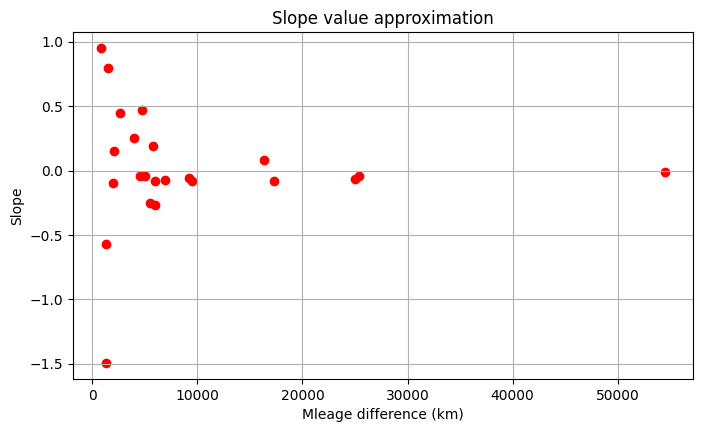

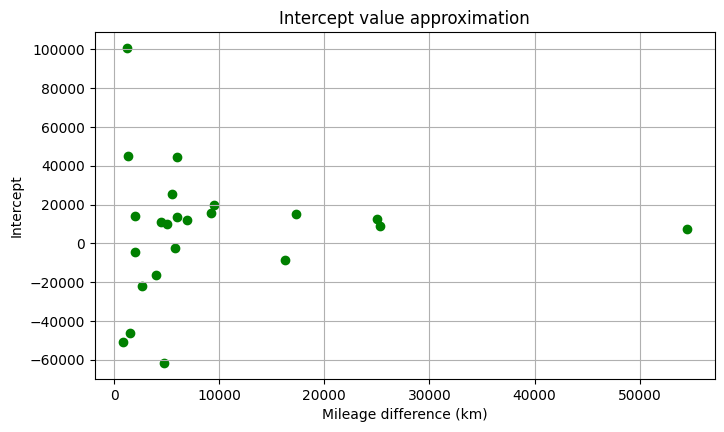

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def build_df_affine(df: pd.DataFrame) -> tuple[float, float, pd.DataFrame]:
    total_a, total_b = 0, 0
    df_affine = pd.DataFrame(dtype=np.float64, columns=['km', 'a', 'b'])

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        df_affine.loc[len(df_affine)] = [x2 - x1, a, b]
        total_a += a
        total_b += b

    a = total_a / (len(df) - 1)
    b = total_b / (len(df) - 1)

    return (a, b, df_affine)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b, df_affine = build_df_affine(df)

    a_tab = [[df_affine['km'].min(), df_affine['km'].max()],
             [a, a]]
    b_tab = [[df_affine['km'].min(), df_affine['km'].max()],
             [b, b]]

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df_affine['km'], df_affine['a'], color='red', marker='o')
    # plt.plot(a_tab[0], a_tab[1], color='red', linestyle = '-')
    plt.grid(True)

    plt.title("Slope value approximation")
    plt.xlabel("Mleage difference (km)")
    plt.ylabel("Slope")

    plt.show()

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df_affine['km'], df_affine['b'], color='green', marker='o')
    # plt.plot(b_tab[0], b_tab[1], color='green', linestyle = '-')
    plt.grid(True)

    plt.title("Intercept value approximation")
    plt.xlabel("Mileage difference (km)")
    plt.ylabel("Intercept")

    plt.show()

if __name__ == "__main__":
    main()

On observe que : **plus la différence entre $x_1$ et $x_2$** est grande, plus la valeur de la pente et de l’ordonnée à l’origine est stable. Il convient donc de pondérer la contribution de chaque segment dans notre moyenne. C’est ce que l’on appelle ici une moyenne pondérée selon $\Delta x$.

La formule pour la pente moyenne pondérée est la suivante:

$$ \bar{a} = \frac{\sum_i a_i \cdot \Delta x_i}{\sum_i \Delta x_i} $$

- $\bar{a}$ : la pente moyenne pondérée, calculée par l’algorithme.
- $\sum_i a_i \cdot \Delta x_i$ : somme des produits de chaque coefficient $a_i$ par la différence entre $x_1$ et $x_2$ ($\Delta x$).
- $\sum_i \Delta x_i$ : la somme des longueurs horizontales, soit $x_{\text{max}} - x_{\text{min}}$.

On applique la même formule à $b$:

$$ \bar{b} = \frac{\sum_i b_i \cdot \Delta x_i}{\sum_i \Delta x_i} $$

a: -0.01999 | b:    7937.73732


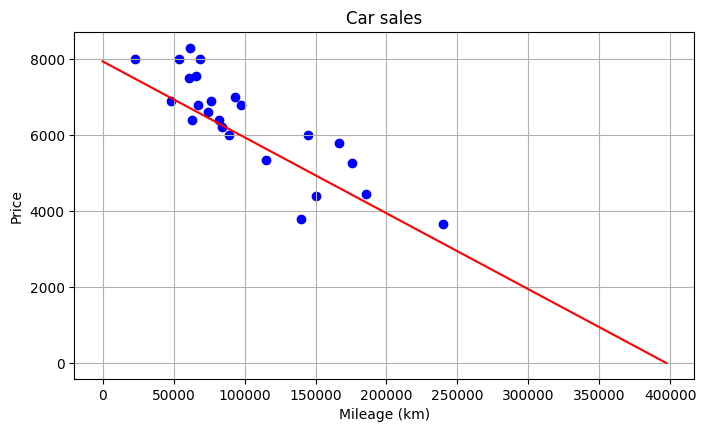

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


def calc_affine(x1: float, y1: float, x2: float, y2: float) -> tuple[float, float]:
    a = (y2 - y1) / (x2 - x1)
    b = y1 - (a * x1)

    return (a, b)


def mean_affine(df: pd.DataFrame) -> tuple[float, float]:
    total_a, total_b = 0, 0

    for (x1, y1), (x2, y2) in zip(df.iloc[:-1][['km', 'price']].values, df.iloc[1:][['km', 'price']].values):
        a, b = calc_affine(x1, y1, x2, y2)
        p = x2 - x1
        total_a += a * p
        total_b += b * p

    p = df['km'].max() - df['km'].min()
    a = total_a / p
    b = total_b / p

    return (a, b)


def main():
    df = pd.read_csv("../data/data.csv")
    df = df.sort_values('km')

    a, b = mean_affine(df)
    print(f"a: {a: .5f} | b: {b: 13.5f}")

    x_val = [0, -b / a]
    y_val = [b, 0]

    plt.figure(figsize=(8, 4.5))
    plt.scatter(df['km'], df['price'], color='blue', marker='o')
    plt.plot(x_val, y_val, color='red', linestyle='-', label='Affine approximation')
    plt.grid(True)

    plt.title("Car sales")
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")

    plt.show()

    plt.show()

if __name__ == "__main__":
    main()

On dispose maintenant d’une fonction affine permettant d’approximer de manière fiable le prix de vente en fonction du kilométrage.

## Conclusion

La fonction affine obtenue est :
$$
f(x) = -0.01999 \cdot x + 7937.74
$$

Nous avons ainsi trouvé que **le prix d’une voiture neuve est estimé à 7937.74**, et **qu’il diminue en moyenne de 0.01999 par kilomètre parcouru**.

Nous avons ainsi trouvé une fonction affine fournissant une approximation fiable du prix de vente en fonction du kilométrage.
